# Simple text classification using ```scikit-learn```

## Import packages


In [1]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [9]:
filename = os.path.join("..", "..", "431868", "classification_data", "fake_or_real_news.csv")

data = pd.read_csv(filename, index_col = 0)

__Inspect data__

In [10]:
data.sample(10)

,title,text,label
1390,"With rise in polls, Cruz becomes potential Tru...",The once-friendly rivalry between Ted Cruz and...,REAL
8855,Tony Blair suggests a second referendum to rev...,Tony Blair suggests a second referendum to rev...,FAKE
5353,Trump Raises Concern Over Members Of Urban Com...,Nation Puts 2016 Election Into Perspective By ...,FAKE
10083,Koch Brothers Helped Incite the Impending Bloo...,"By Rmuse 7:57 pm ""If the party doesn’t learn...",FAKE
1902,Bernie Sanders to announce 2016 intentions on ...,"Sanders, an independent senator who caucuses w...",REAL
10317,Don’t Despair: Why This Election Is Our Greate...,0 About Us \nThe Mind Unleashed is a conscious...,FAKE
8633,Trump's Victory Proves US Political Class Out ...,\nRon Paul Institute for Peace and Prosperity ...,FAKE
172,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL
3854,"To get around Congress, Obama turns to city halls",WASHINGTON — President Obama has quietly racke...,REAL
8010,"Hillary FRANTIC As Dirty Secret Implodes, Gets...",Share This \nHillary Clinton thought her email...,FAKE


In [11]:
data.shape

(6335, 3)

<br>
Q: How many examples of each label do we have?

In [12]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<br>

Let's now create new variables called ```X``` and ```y```, taking the data out of the dataframe so that we can mess around with them.

In [13]:
X = data["text"] # input data is generally indicated with capital X
y = data["label"]

In [15]:
type(X) # a series is a fancy list that you can treat like a data frame

pandas.core.series.Series

## Train-test split

I've included most of the 'hard work' for you here already, because these are long cells which might be easy to mess up while live-coding.

Instead, we'll discuss what's happening. If you have questions, don't be shy!

In [16]:
# we want to train a model on a different set of data than what we test it on
# this prevents overfitting and makes the model generalizable to new data
X_train, X_test, y_train, y_test = train_test_split(# texts for the model
                                                    X, 
                                                    # classification labels
                                                    y, 
                                                    # create an 80/20 split
                                                    test_size = 0.2, 
                                                    # random state for reproducibility
                                                    random_state = 42) 

## Vectorizing and Feature Extraction

Vectorization. What is it and why are all the cool kids talking about it?

Essentially, vectorization is the process whereby textual or visual data is 'transformed' into some kind of numerical representation. One of the easiest ways to do this is to simple count how often individual features appear in a document.

Take the following text: 
<br><br>
<i>My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.</i>
<br>

We can convert this into the following vector

| and | be | being | both | called | came | christian | could | explicit | family | father | i | infant | longer | make | more | my | myself | name | names | nothing | of | or | philip | pip | pirrip | s | so | than | to | tongue|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 1 | 1 | 1 | 1 | 1 |

<br>
Our textual data is hence reduced to a jumbled-up 'vector' of numbers, known somewhat quaintly as a <i>bag-of-words</i>.
<br>
<br>
To do this in practice, we first need to create a vectorizer. 

Tf-idf vectors tend to be better for training classifiers. Why might that be?

__Create vectorizer object__

In [17]:
vectorizer = CountVectorizer(# unigrams and bigrams (1 word and 2 word units)
                            ngram_range = (1,2), 
                            # why use lowercase?
                             lowercase =  True, 
                             # remove very common words
                             max_df = 0.95, 
                             # remove very rare words
                             min_df = 0.05, 
                             # keep only top 100 features
                             max_features = 100) 

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

In [18]:
# first we fit to the training data...
# take input text and fit it to the parameters
# output is transformed - vector of length 100 (vocabulary)
X_train_feats = vectorizer.fit_transform(X_train)

#... then do it for our test data
# the vocab being used to predict from is same as X_train_feats
# you are NOT fitting to new data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()

In [19]:
feature_names

array(['about', 'after', 'all', 'also', 'an', 'and', 'and the', 'are',
       'as', 'at', 'at the', 'be', 'because', 'been', 'but', 'by',
       'campaign', 'can', 'clinton', 'could', 'do', 'even', 'first',
       'for', 'for the', 'from', 'had', 'has', 'have', 'he', 'her',
       'hillary', 'him', 'his', 'how', 'if', 'in', 'in the', 'into', 'is',
       'it', 'its', 'just', 'like', 'many', 'more', 'most', 'new', 'no',
       'not', 'now', 'obama', 'of', 'of the', 'on', 'on the', 'one',
       'only', 'or', 'other', 'our', 'out', 'over', 'party', 'people',
       'president', 'republican', 'said', 'she', 'so', 'some', 'state',
       'states', 'than', 'that', 'that the', 'their', 'them', 'there',
       'they', 'this', 'time', 'to be', 'to the', 'trump', 'two', 'up',
       'us', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will',
       'with', 'with the', 'would', 'you'], dtype=object)

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

In [20]:
classifier = LogisticRegression(random_state = 42).fit(X_train_feats, y_train)

Q: How do we use the classifier to make predictions?

In [21]:
y_pred = classifier.predict(X_test_feats)

Q: What are the predictions for the first 20 examples of the test data?

In [22]:
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL']


We can also inspect the model, in order to see which features are most informative when trying to predict a label. 

To do this, we can use the ```show_features``` function that I defined earlier - how convenient!

Q: What are the most informative features? Use ```show_features```to find out!

In [23]:
clf.show_features(vectorizer, y_train, classifier, n = 20)

FAKE				REAL

-0.2027	just           		0.3138	but            
-0.1674	by             		0.2158	said           
-0.1255	that the       		0.1835	state          
-0.1192	us             		0.1717	than           
-0.1078	be             		0.1492	who            
-0.0968	this           		0.1446	most           
-0.0906	with           		0.1258	obama          
-0.0878	had            		0.1145	other          
-0.0820	you            		0.1073	more           
-0.0690	so             		0.1019	up             
-0.0670	to the         		0.0988	on the         
-0.0668	all            		0.0953	also           
-0.0626	is             		0.0834	president      
-0.0616	of the         		0.0723	one            
-0.0614	into           		0.0693	she            
-0.0612	there          		0.0693	two            
-0.0560	was            		0.0652	that           
-0.0550	like           		0.0647	out            
-0.0548	now            		0.0544	to be          


## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

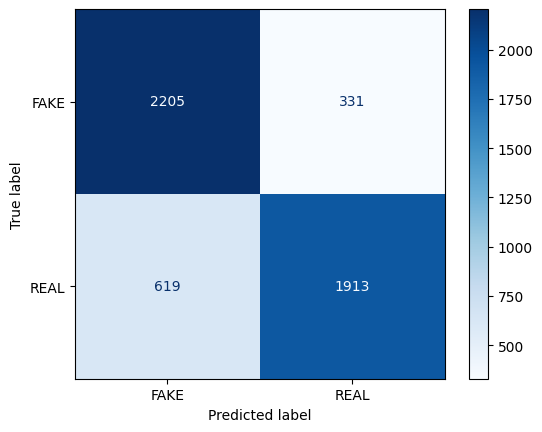

In [24]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

This confusion matrix can be broken down a little bit more and used to draw more meaningful statistical results:

<img src="../img/confusionMatrix.jpg" alt="Alternative text" />

__Calculating metrics__

```scikit-learn``` has a built-in set of tools which can be used to calculate these metrics, to get a better idea of how our model is performing.

In [25]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

        FAKE       0.79      0.86      0.83       628
        REAL       0.85      0.78      0.81       639

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



## Cross validation and further evaluation

One thing we can't be sure of is that our model performance is simply related to how the train-test split is made.

To try to mitigate this, we can perform cross-validation, in order to test a number of different train-test splits and finding the average scores.

Let's do this on the full dataset:

In [26]:
X_vect = vectorizer.fit_transform(X)

The first plot is probably the most interesting. Some terminology:

- If two curves are "close to each other" and both of them but have a low score, the model suffers from an underfitting problem (High Bias)

- If there are large gaps between two curves, then the model suffer from an overfitting problem (High Variance)


/home/coder/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/coder/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

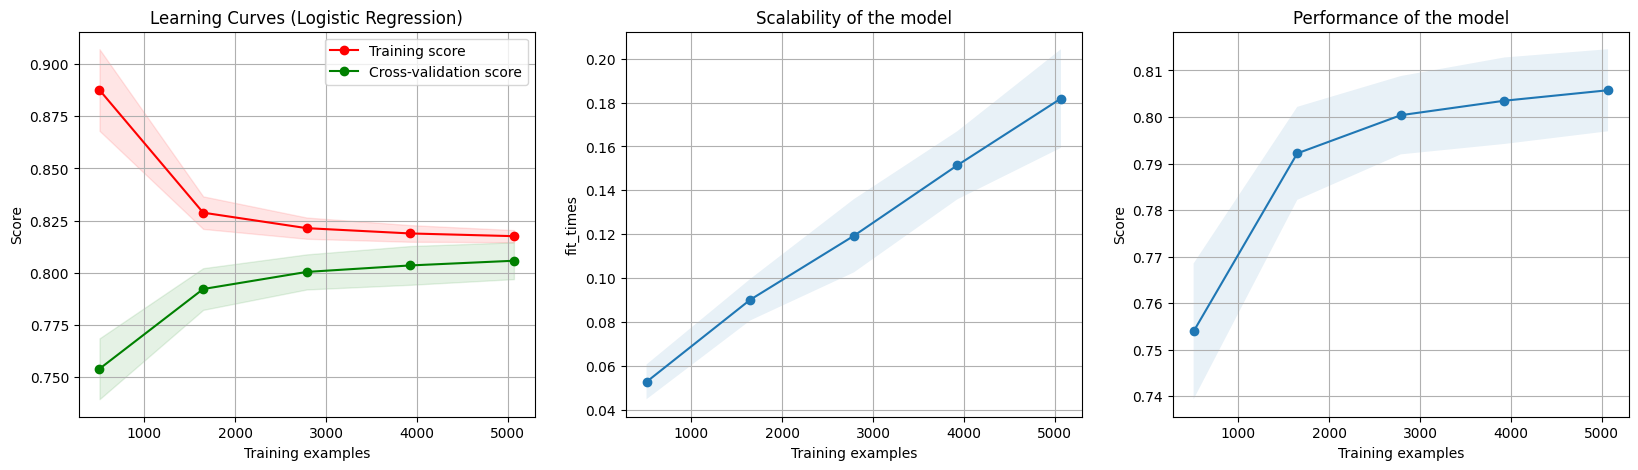

In [27]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=4)

- The second plot shows how model performance scales when more data is added;
- The third plot shows how much of a performance improvement we get from adding more data

## Save models

It is also somewhat trivial to save models and reload them for later use. For that, we can use the library ```joblib```.

In [28]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [29]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

In [34]:
sentence = "Hungarian politician caught taking Ecstasy at lockdown-defying 25-man gay orgy."

In [35]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype=object)

## Appendix - Interpreting a confusion matrix

Imagine that we are testing a classifier to see how well it can predict if someone has COVID:


```Accuracy => (TP+TN)/(TP+FP+FN+TN)```
- Ratio of correct classifications across all of the patients

```True Positive Rate => Recall  => Sensitivity => (TP / TP + FN)```
- The proportion of the positive class who were correctly classified
    - I.e sick people correctly identified as being sick

```Precision =>  (TP / TP + FP)```
- The ration of true positives to everyone predicted as positive
    - I.e. the proportion we identify as having COVID who actually do have it

```True negative rate => Specificity => (TN / TN + FP)```
- The proportion of the negative class who were correctly classified
    - I.e. healthy people who were correctly identified as being healthy

The following can also be calculated but are not featured on the confusion matrix above:

```False negative rate => (FN / TP + FN)```
- Proportion of the positive class who were incorrectly classified by the classifier
  - I.e. people predicted as healthy who are actually sick

```False positive rate = (FP / TN + FP) = 1 - Specificity```
- Proportion of the negative class who were incorrectly classified by the classifier
  - I.e. people predicted as sick who are actually healthy

```F1 => 2(P*R / P + R)```
- Harmonic mean of precision and recall, useful where both precision and recall are important